In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
from fu import meaning_similarity,load_embeddings

In [3]:
from models import captionning,classification,detection

c:\Users\tomse\OneDrive - IMT Mines Albi\Documents\école\IFIE2\Stage2\stage\intern\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Files already downloaded and verified
[]


In [4]:
embedding=load_embeddings('vector.txt')

In [5]:
def results(image):
    caption=captionning.show_n_generate(image)
    class1=classification.eval(image)
    class2=detection.get_prediction(image,0.5)
    return caption,class1,class2[-1]

In [6]:
def comp(classif,detec):
    sure=[]
    unsure=[]
    if len(classif)>0:
        for x in classif:
            m=0
            s=x
            for y in detec:
                sim=meaning_similarity(x,y,embedding)
                if sim>m and sim>0.8:
                    s=y
                    m=sim
            if m!=0:
                sure+=[s]
            else:
                unsure+=[s]
    for y in detec:
        if y not in sure:
            unsure+=[y]
    return sure,unsure

In [7]:
def final(sure,unsure,caption):
    p=0
    if len(sure)>0:
        if len(unsure)>0:
            for x in sure:
                m=0
                for y in caption:
                    sim=meaning_similarity(x,y,embedding)
                    if sim>m:
                        m=sim
                p+=m*80/len(sure)
            for x in unsure:
                m=0
                for y in caption:
                    sim=meaning_similarity(x,y,embedding)
                    if sim>m:
                        m=sim
                p+=m*20/len(unsure)
        else:
            for x in sure:
                m=0
                for y in caption:
                    sim=meaning_similarity(x,y,embedding)
                    if sim>m:
                        m=sim
                p+=m*100/len(sure)

    else:
        for x in unsure:
            m=0
            for y in caption:
                sim=meaning_similarity(x,y,embedding)
                if sim>m:
                    m=sim
            p+=m*100/len(unsure)
    print(' '.join(caption))
    return p

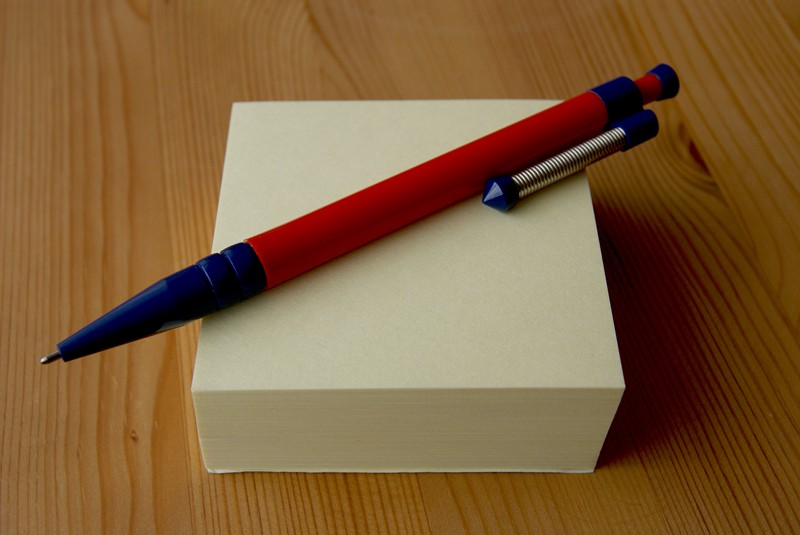

In [13]:
imag='16.jpg'
image = Image.open(imag)
display(image)

In [14]:
res=results(imag)
c=comp([t[0] for t in res[1]],res[2])
final(c[0],c[1],res[0].split())

IndexError: list index out of range

In [15]:
res

('a pair of glasses on a wooden table ', [], ['dining table'])

In [11]:
meaning_similarity('table','dining table',embedding)

0